In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df.shape

(100, 4)

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
import matplotlib.pyplot as plt


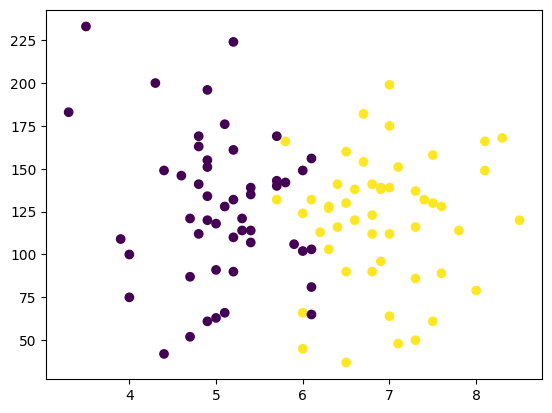

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y.shape

(100,)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
73,4.9,61.0
31,3.9,109.0
93,6.8,112.0
32,7.0,139.0
45,6.0,66.0
...,...,...
20,6.6,120.0
83,7.5,130.0
82,6.5,37.0
10,6.0,45.0


In [16]:
y_train

73    0
31    0
93    1
32    1
45    1
     ..
20    1
83    1
82    1
10    1
13    1
Name: placement, Length: 90, dtype: int64

In [17]:
X_test

,cgpa,iq
63,6.3,128.0
25,5.0,91.0
49,5.4,135.0
56,6.1,65.0
89,4.9,151.0
75,4.8,169.0
33,6.0,149.0
50,3.5,233.0
52,7.0,175.0
3,7.4,132.0


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[-0.99495666, -1.56207985],
       [-1.87544928, -0.32160468],
       [ 0.67797932, -0.24407498],
       [ 0.85407784,  0.45369231],
       [-0.02641478, -1.43286369],
       [ 2.17481677, -0.03732911],
       [-1.17105518, -0.8901558 ],
       [-0.73080887, -0.29576144],
       [-1.78740002, -0.55419377],
       [ 0.9421271 ,  0.7638111 ],
       [-0.02641478,  0.06604382],
       [ 0.85407784, -0.24407498],
       [-0.73080887,  2.6503671 ],
       [ 0.9421271 , -1.89804188],
       [ 0.76602858, -0.6575667 ],
       [ 1.29432415,  0.94471374],
       [ 0.06163448,  0.27278968],
       [ 1.11822563, -0.14070205],
       [ 0.67797932,  0.50537878],
       [-1.08300592,  1.0739299 ],
       [ 0.06163448,  0.89302727],
       [ 0.23773301,  0.14357352],
       [ 1.82261972,  0.71212464],
       [ 0.85407784, -1.48455016],
       [-1.08300592,  0.50537878],
       [-0.29056256,  0.55706524],
       [ 1.38237341, -0.83846933],
       [ 0.41383153, -0.8126261 ],
       [-1.52325223,

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[ 0.23773301,  0.16941675],
       [-0.9069074 , -0.78678287],
       [-0.55471035,  0.35031938],
       [ 0.06163448, -1.45870692],
       [-0.99495666,  0.7638111 ],
       [-1.08300592,  1.2289893 ],
       [-0.02641478,  0.71212464],
       [-2.22764633,  2.8829562 ],
       [ 0.85407784,  1.38404869],
       [ 1.20627489,  0.27278968]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = clf.predict(X_test)

In [28]:
y_test

63    1
25    0
49    0
56    0
89    0
75    0
33    0
50    0
52    1
3     1
Name: placement, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.8

In [31]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

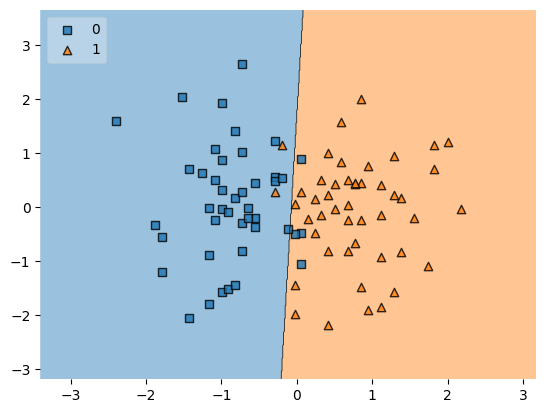

In [32]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [103]:
import pickle

In [104]:
pickle.dump(clf,open('model.pkl','wb'))